In [1]:
import cv2
import numpy as np

In [3]:
from google.colab.patches import cv2_imshow

In [48]:
import collections

In [10]:
img = cv2.imread('1.png',0)

<b>Source Image</b>

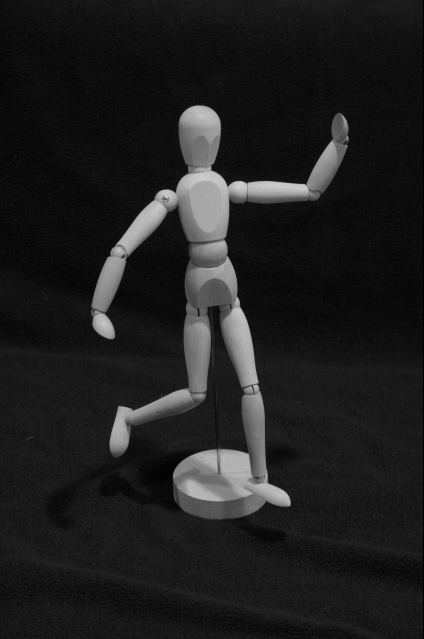

In [39]:
cv2_imshow(img)

<b>Converting Gray Scale image to binary image</b>

In [11]:
height = img.shape[0]
width = img.shape[1]
threshold = 50

for i in np.arange(height):
    for j in np.arange(width):
        a = img.item(i,j) 
        if a > threshold:
           b = 255
        else:
           b = 0
    img.itemset((i,j), b)

In [35]:
threshold,threshold_image = cv2.threshold(img,32,255,cv2.THRESH_BINARY) 

<b>Binary image to use for further processing</b>

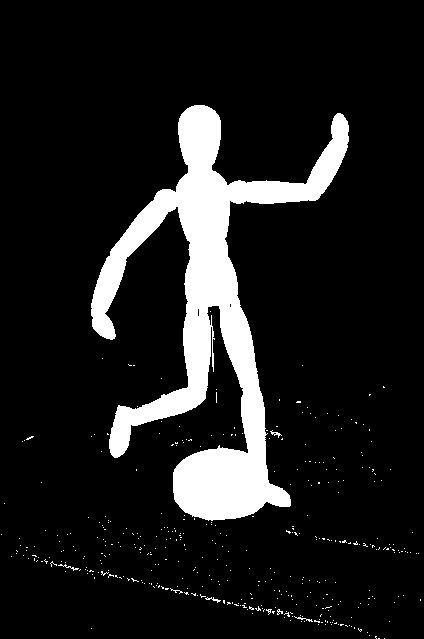

In [36]:
cv2_imshow(threshold_image)

<b>Keeping count of 1's and 0's to observe the result in furhter operations</b>

In [52]:
unique, counts = np.unique(threshold_image, return_counts=True)
dict(zip(unique, counts))

{0: 240202, 255: 30734}

<b>Performing Erosion operation, after applying it is expected that count of pixel with 1 value will decrease and count of pixel with 0 value will increase</b>

In [37]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(threshold_image,kernel,iterations = 1)

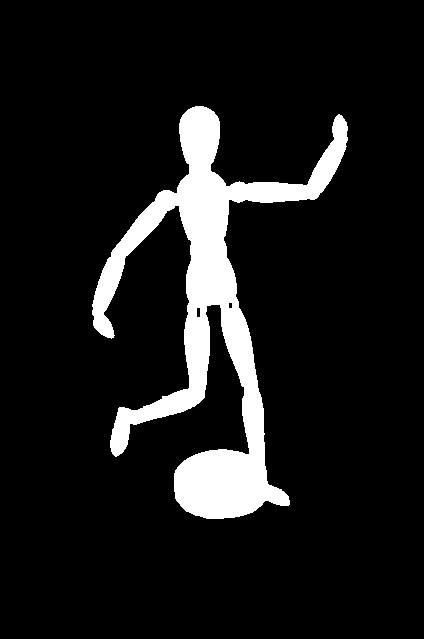

In [38]:
cv2_imshow(erosion)

<b>As expected from erosion, count of pixel with value 1 has decreased on 0 valued pixel count is increased</b>

In [53]:
unique, counts = np.unique(erosion, return_counts=True)
dict(zip(unique, counts))

{0: 243983, 255: 26953}

<b>Applying Dilation, it is expected that count of 1 valued pixel will increase and count of 0 pixel will decrease compare to source image</b>

In [42]:
dilation = cv2.dilate(threshold_image,kernel,iterations = 1)

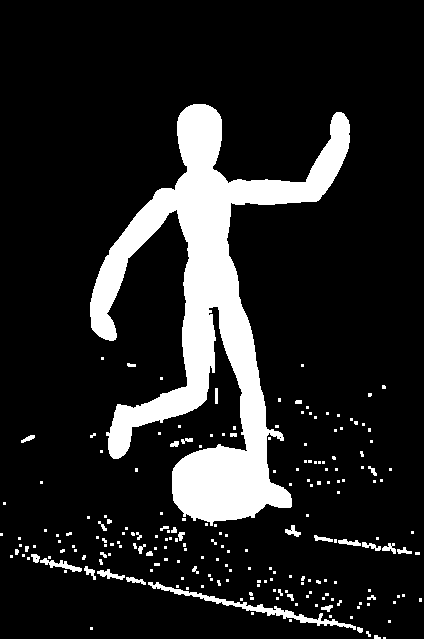

In [43]:
cv2_imshow(dilation)

In [54]:
unique, counts = np.unique(dilation, return_counts=True)
dict(zip(unique, counts))

{0: 233444, 255: 37492}

<b>After applying dialation, count of pixel valued 1 is increased and 0 pixel count has decreased.</b>

<b>Performing Opening, which is erosion followed by Erosion</b>

In [44]:
opening = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel)

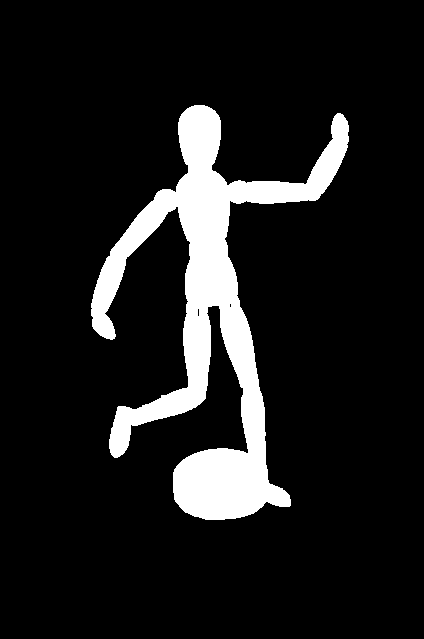

In [45]:
cv2_imshow(opening)

<b>Performing closing operation, which is Dilation followed by Erosion</b>

In [60]:
closing = cv2.morphologyEx(threshold_image, cv2.MORPH_CLOSE, kernel)

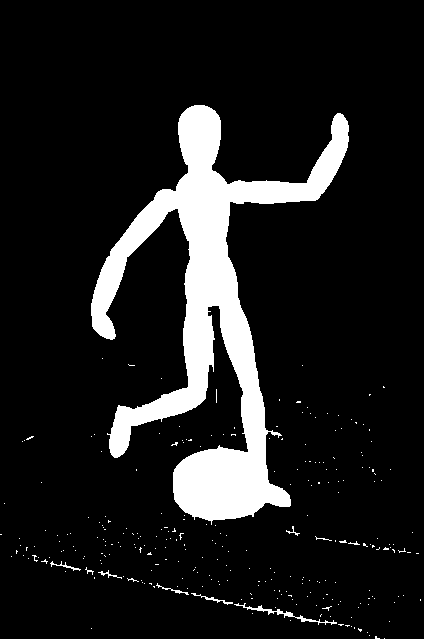

In [61]:
cv2_imshow(closing)

In [55]:
unique, counts = np.unique(opening, return_counts=True)
dict(zip(unique, counts))

{0: 241283, 255: 29653}

<b>Applying gradient operation on eroded image to extract boundries</b>

In [58]:
gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)

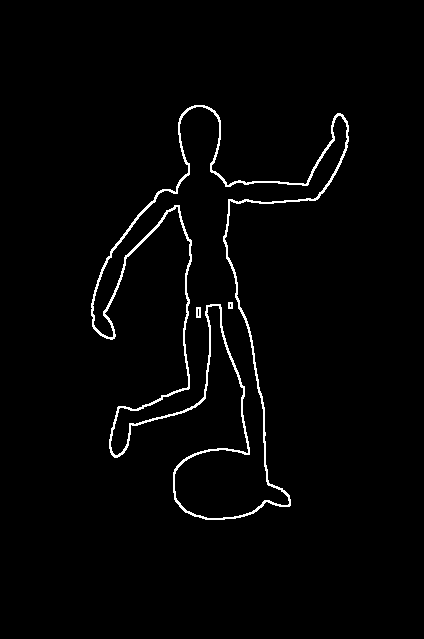

In [59]:
cv2_imshow(gradient)